# Fractal / IFS / Bitmap Fractal Koch Manhattan Pixel Perfect

ビットマップ構成によるマンハッタン・コッホ曲線

date: 2024-01-21

{-Image-, -Image-, -Image-, -Image-, -Image-, -Image-, -Image-, -Image-, -Image-, 
 
>   -Image-, -Image-, -Image-, -Image-, -Image-, -Image-, -Image-, -Image-}
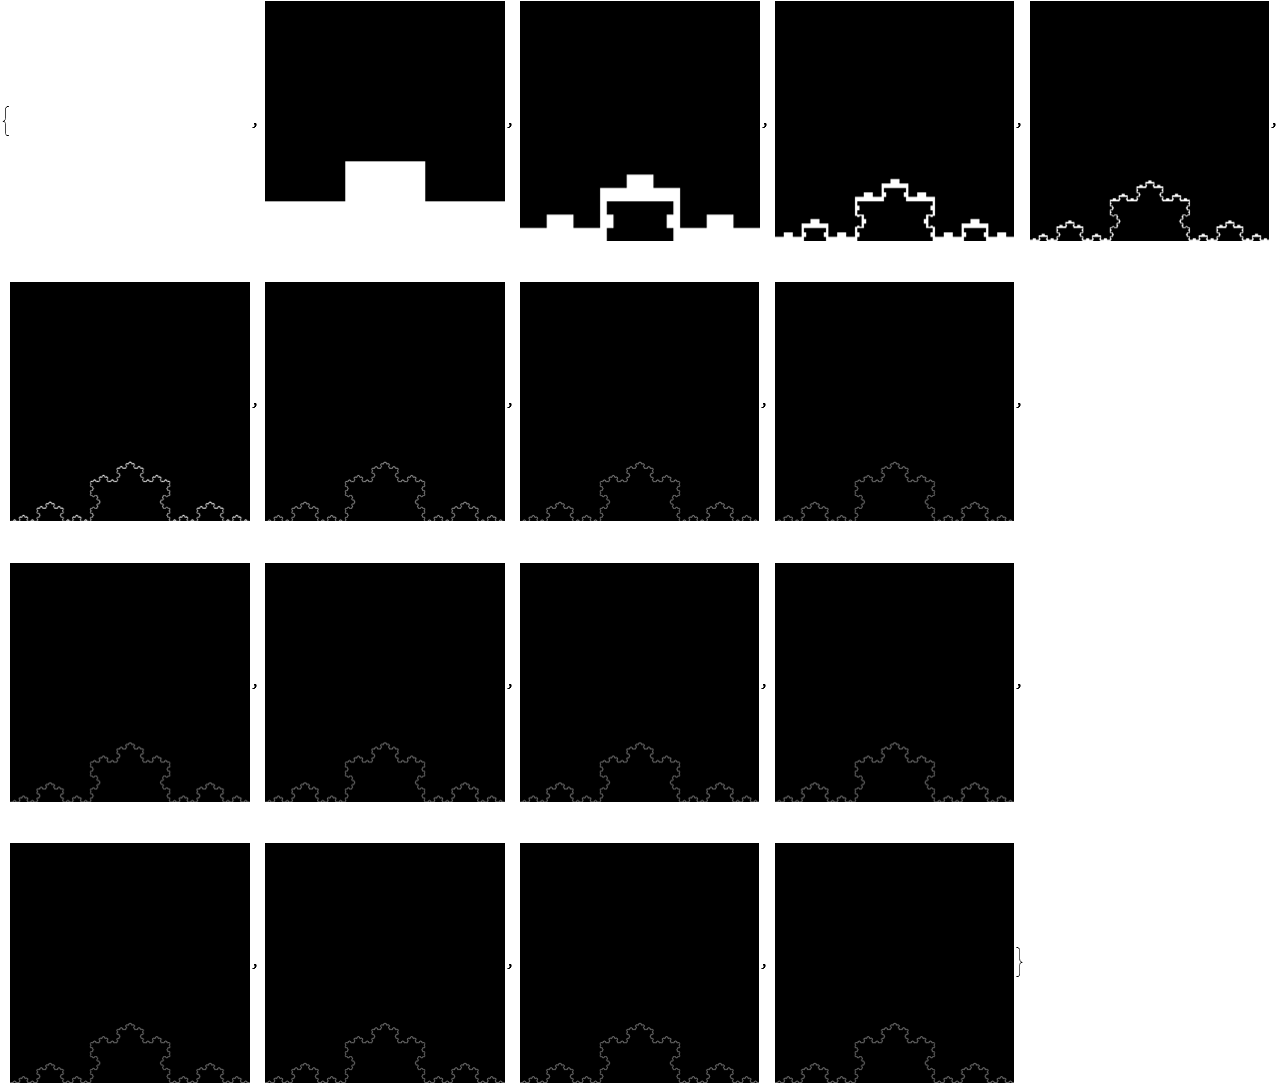

In [21]:
shrink[img_] := ImageResize[img, ImageDimensions[img]/6]

shrink2[img_] := 
    ImageCrop[
        ImageResize[img, ImageDimensions[img]/3], 
        ImageDimensions[img]/6
    , {Right, Top}]

li = FixedPointList[Function[img, ImageMultiply[ImageAssemble[( {
    {o, o, o, o, o, o},
    {o, o, o, o, o, o},
    {o, o, o, o, o, o},
    {o, o, o, o, o, o},
    {o, o, p, q, o, o},
    {p, q, r, l, p, q}
} ) /. {
    o -> ImageMultiply[shrink[img], 0],
    p -> shrink2[img],
    q -> ImageReflect[shrink2[img], Left],
    l -> ImageRotate[ImageMultiply[shrink[img], Sqrt[2]], Pi/2],
    r -> ImageRotate[ImageMultiply[shrink[img], Sqrt[2]], -Pi/2]
}], 3]], Image[ConstantArray[255, {6^4, 6^4}], "Byte"], SameTest -> (Total[#1 - #2] < 0.001 &)]

-Image-
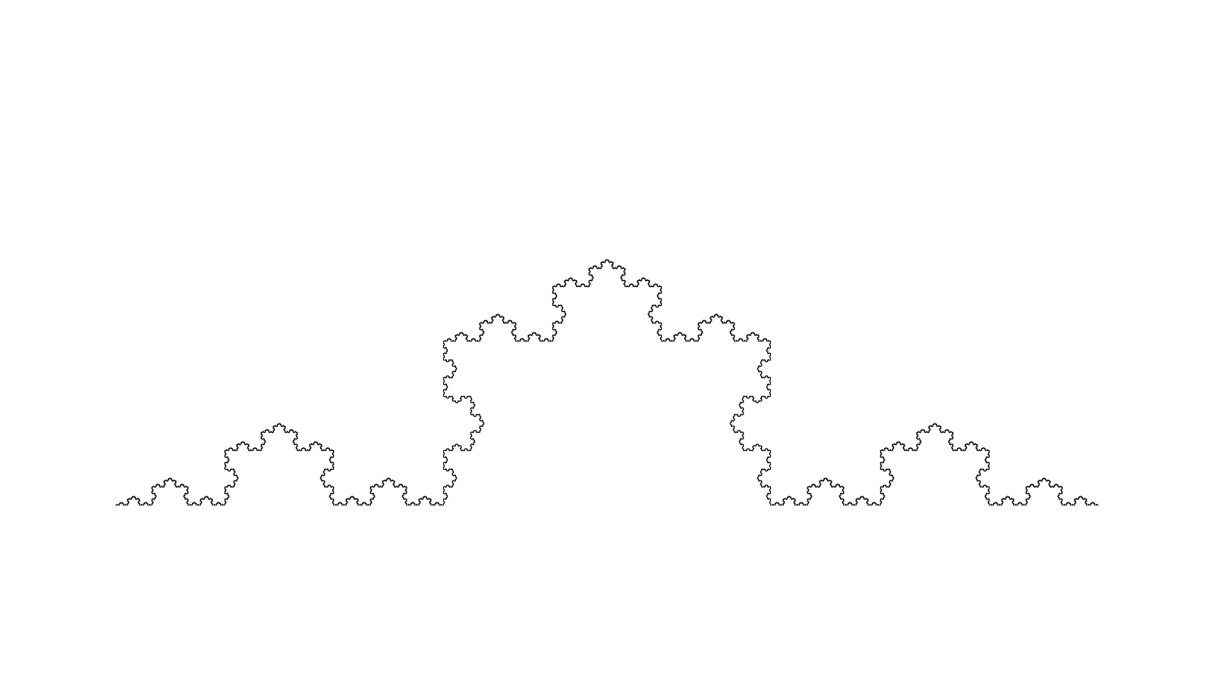

In [30]:
1 - ImageCrop[ImagePad[ImageCrop[Last[li], {1296, 1296 / 3}, Top], 1600], {1600, 900}]